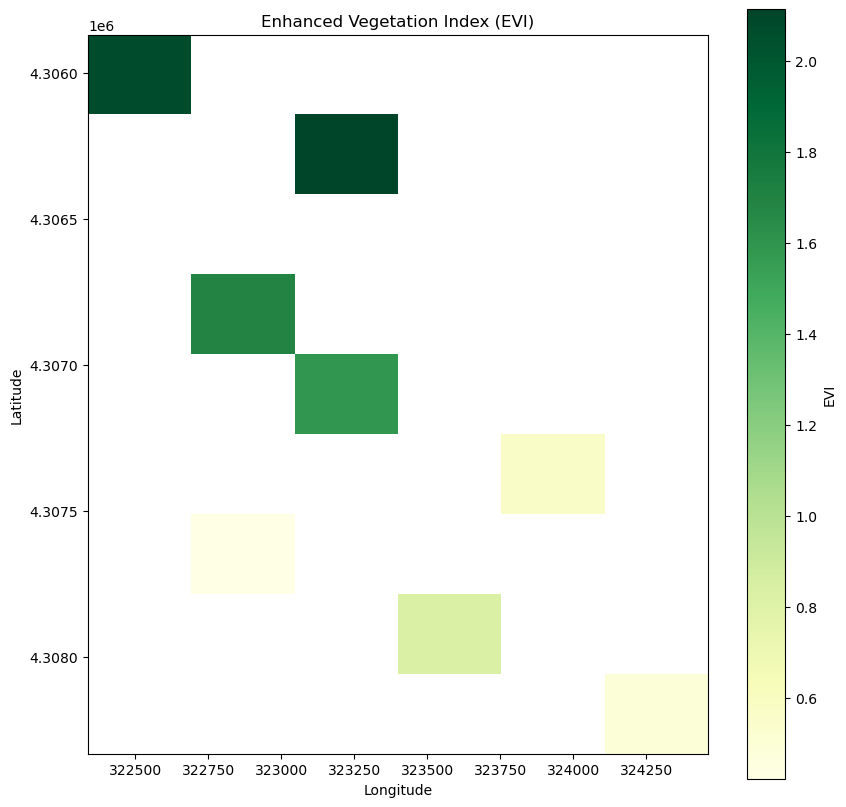

In [12]:
import rasterio
import matplotlib.pyplot as plt

# Load the GeoTIFF file
with rasterio.open('./downloads/evi_composite_output.tif') as dataset:
    # Read the first band
    evi_data = dataset.read(1)

    # Plot the data
    plt.figure(figsize=(10, 10))
    plt.imshow(evi_data, cmap='YlGn', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))
    plt.colorbar(label='EVI')
    plt.title('Enhanced Vegetation Index (EVI)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


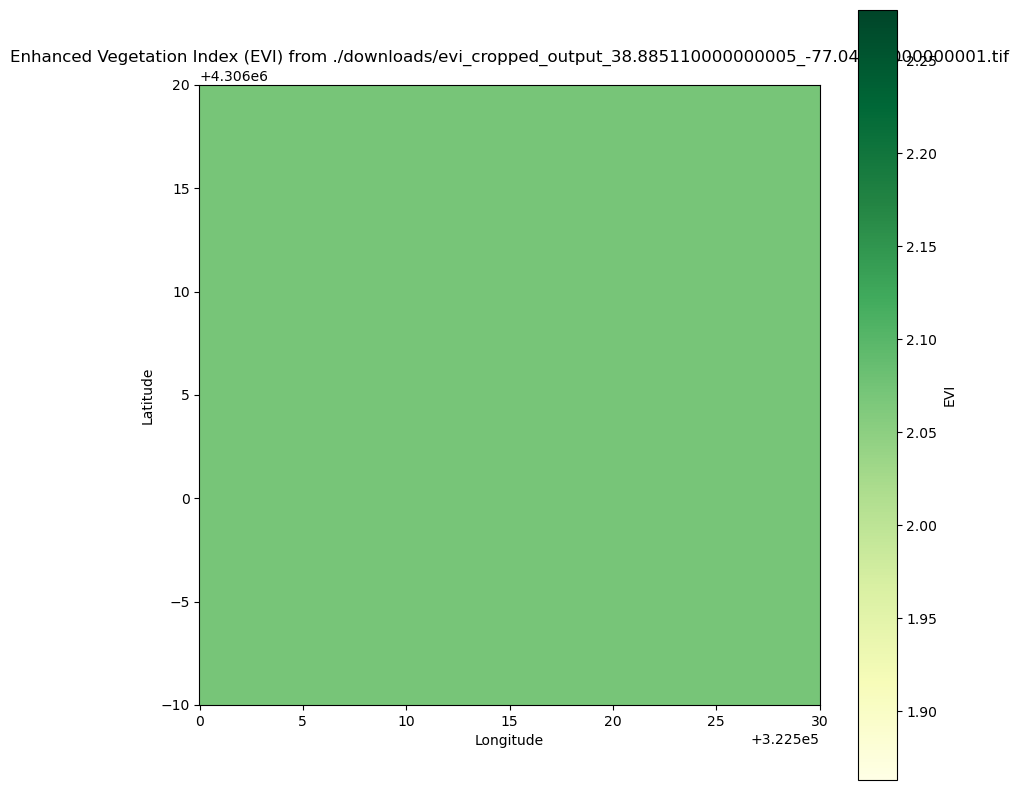

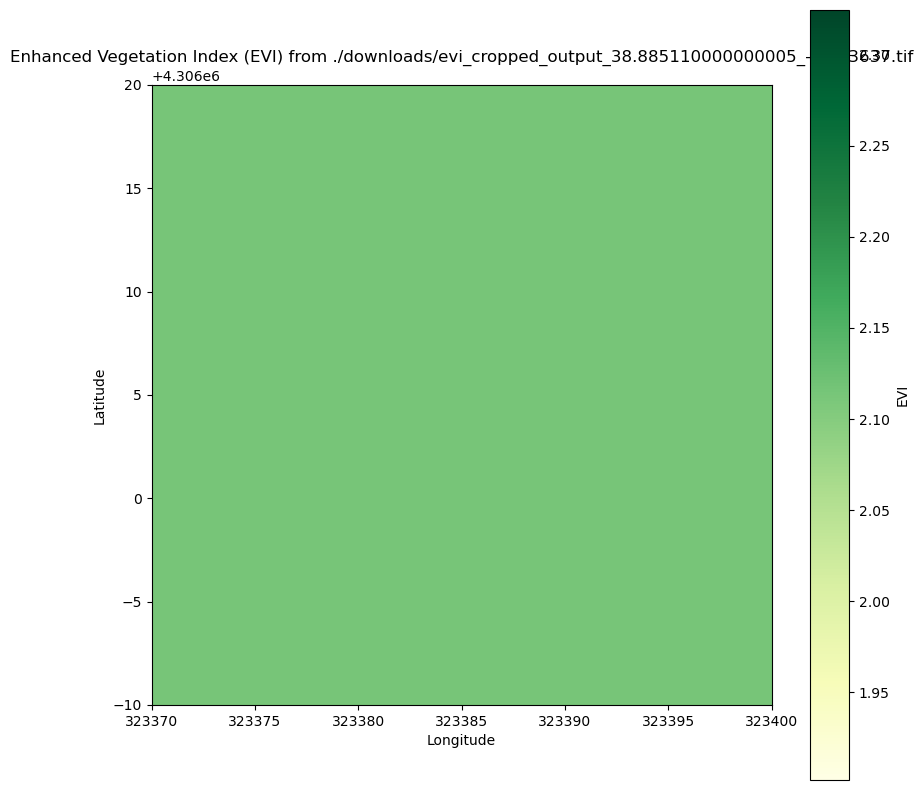

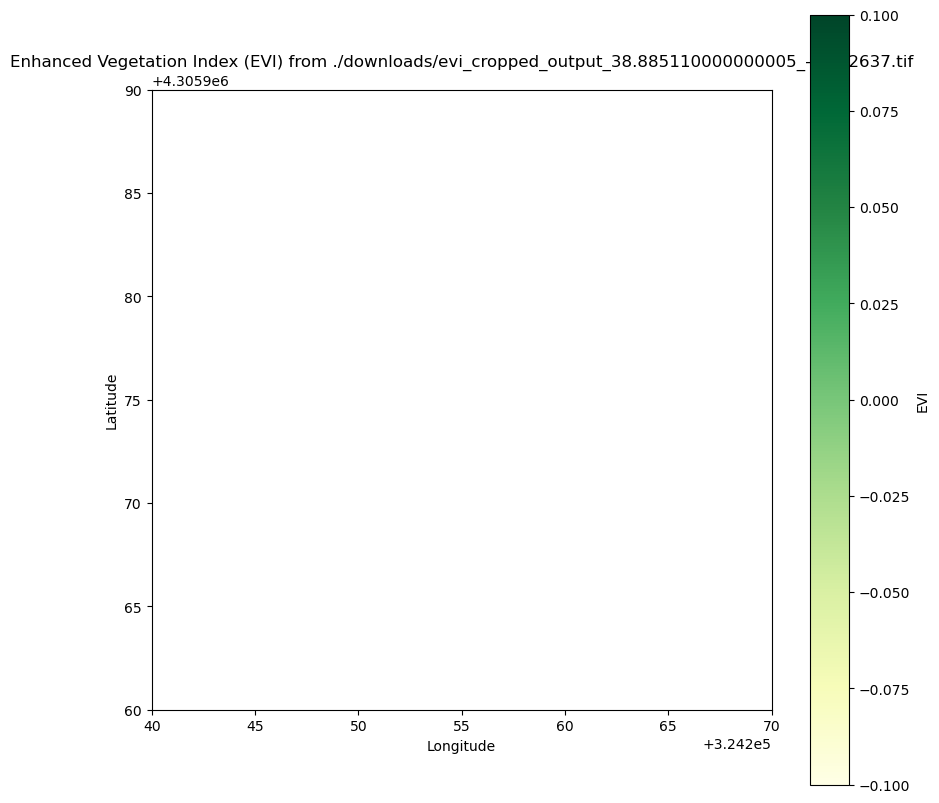

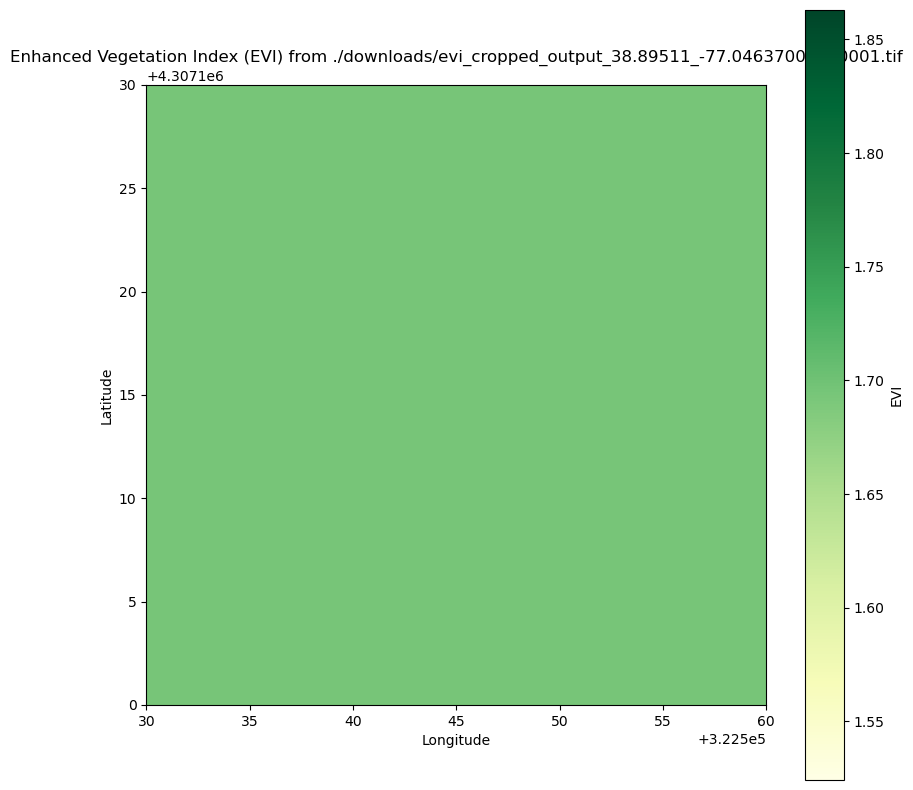

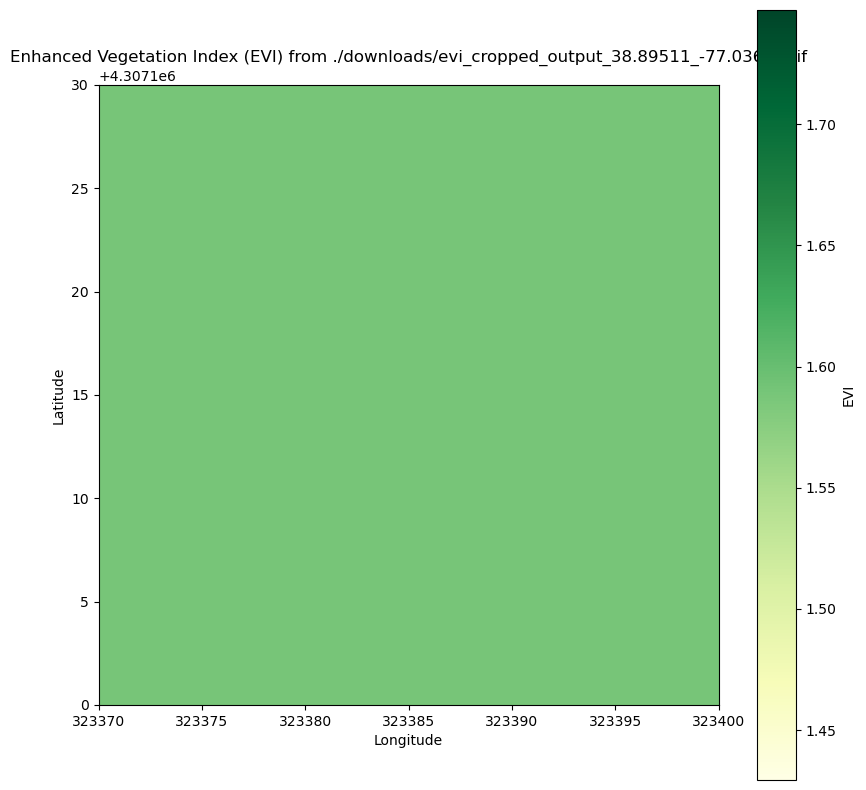

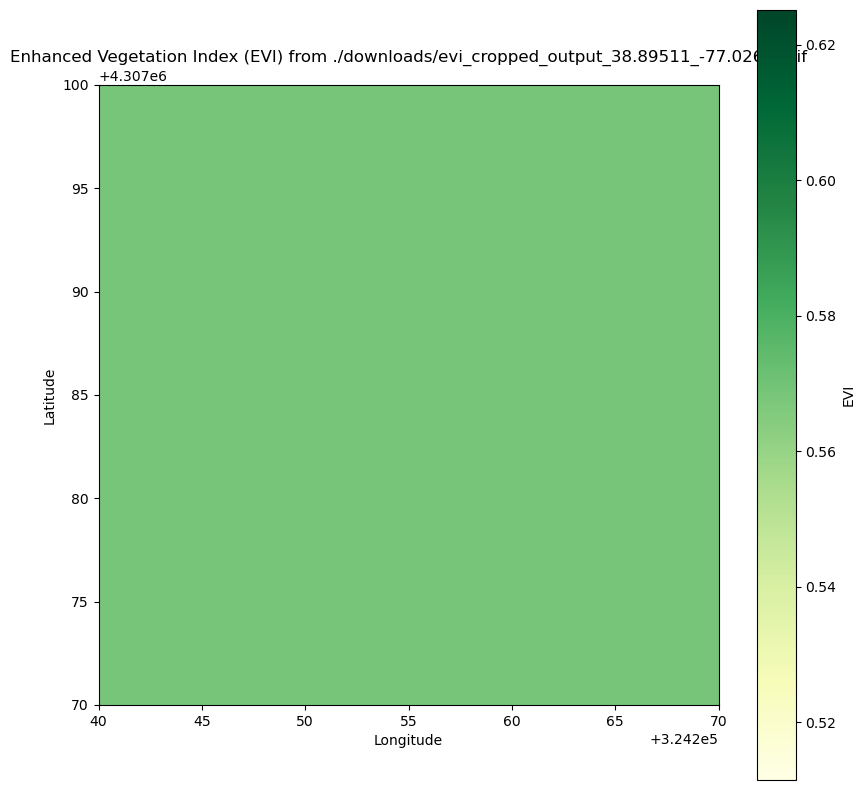

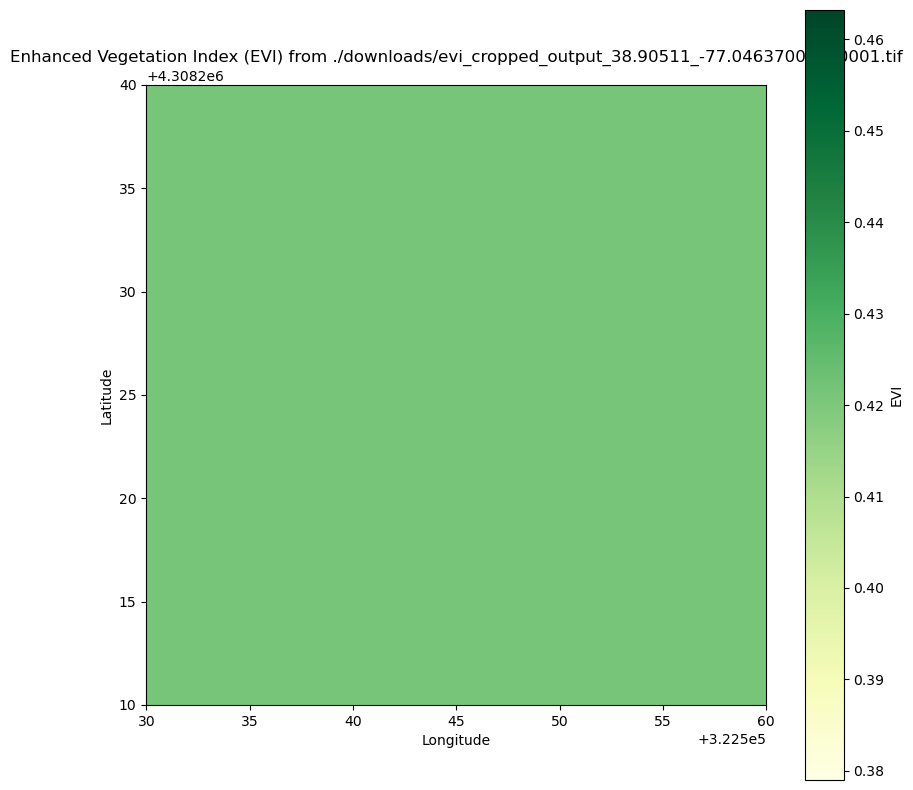

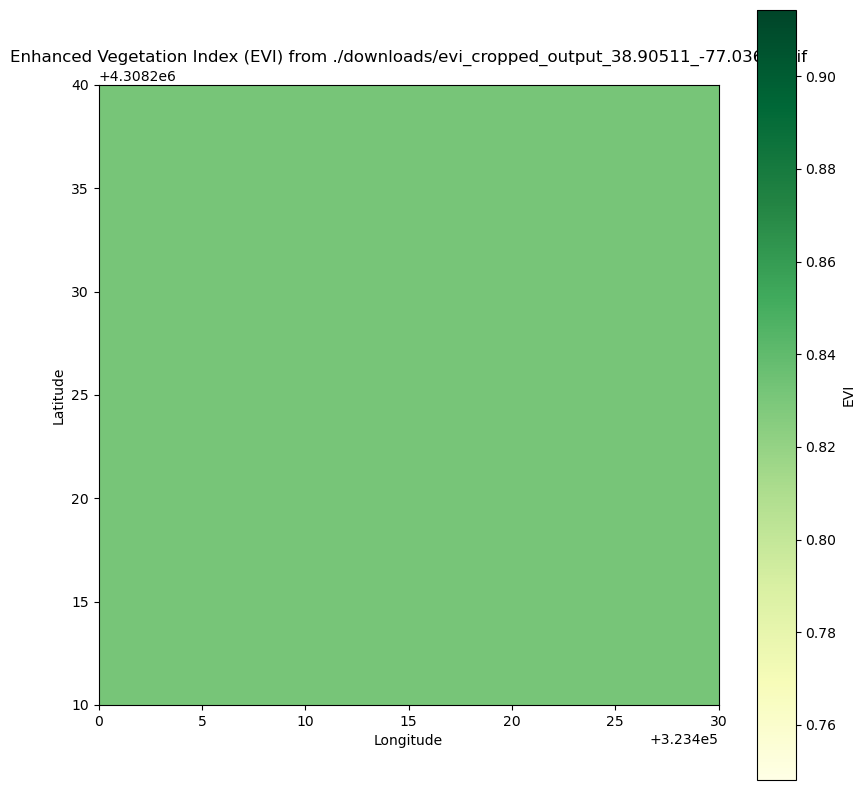

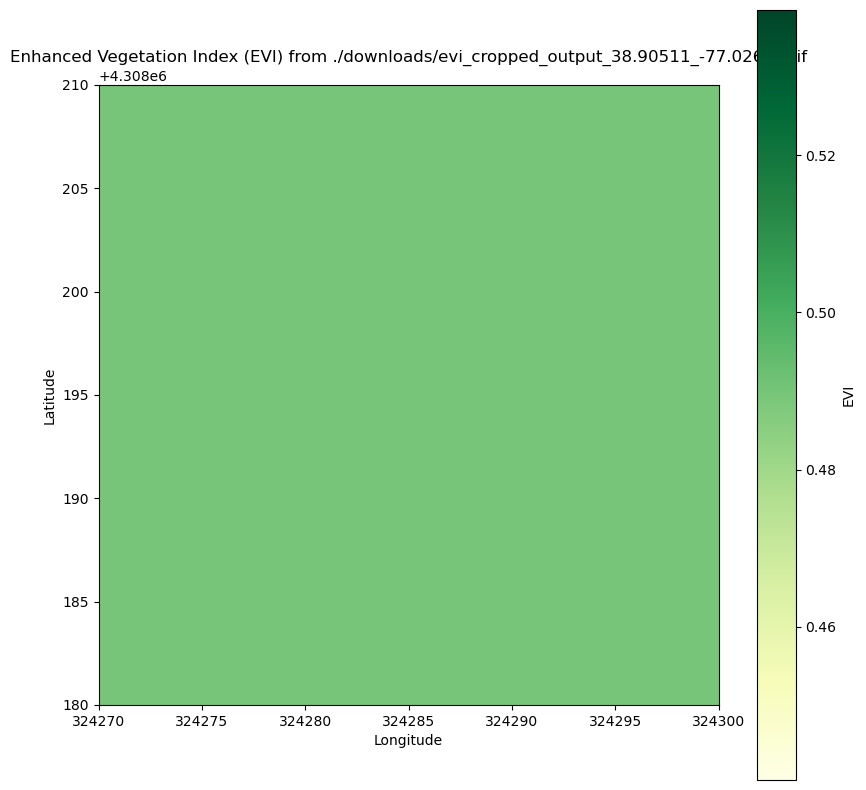

In [9]:
import rasterio
import matplotlib.pyplot as plt

# List of GeoTIFF files
evi_geotiff_urls = [
    "./downloads/evi_cropped_output_38.885110000000005_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.885110000000005_-77.03637.tif",
    "./downloads/evi_cropped_output_38.885110000000005_-77.02637.tif",
    "./downloads/evi_cropped_output_38.89511_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.89511_-77.03637.tif",
    "./downloads/evi_cropped_output_38.89511_-77.02637.tif",
    "./downloads/evi_cropped_output_38.90511_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.90511_-77.03637.tif",
    "./downloads/evi_cropped_output_38.90511_-77.02637.tif"
]

# Loop through each TIFF file and visualize it
for tiff_file in evi_geotiff_urls:
    try:
        with rasterio.open(tiff_file) as dataset:
            # Read the first band
            evi_data = dataset.read(1)

            # Plot the data
            plt.figure(figsize=(10, 10))
            plt.imshow(evi_data, cmap='YlGn', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))
            plt.colorbar(label='EVI')
            plt.title(f'Enhanced Vegetation Index (EVI) from {tiff_file}')
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.show()

    except Exception as e:
        print(f"Failed to load {tiff_file}: {e}")


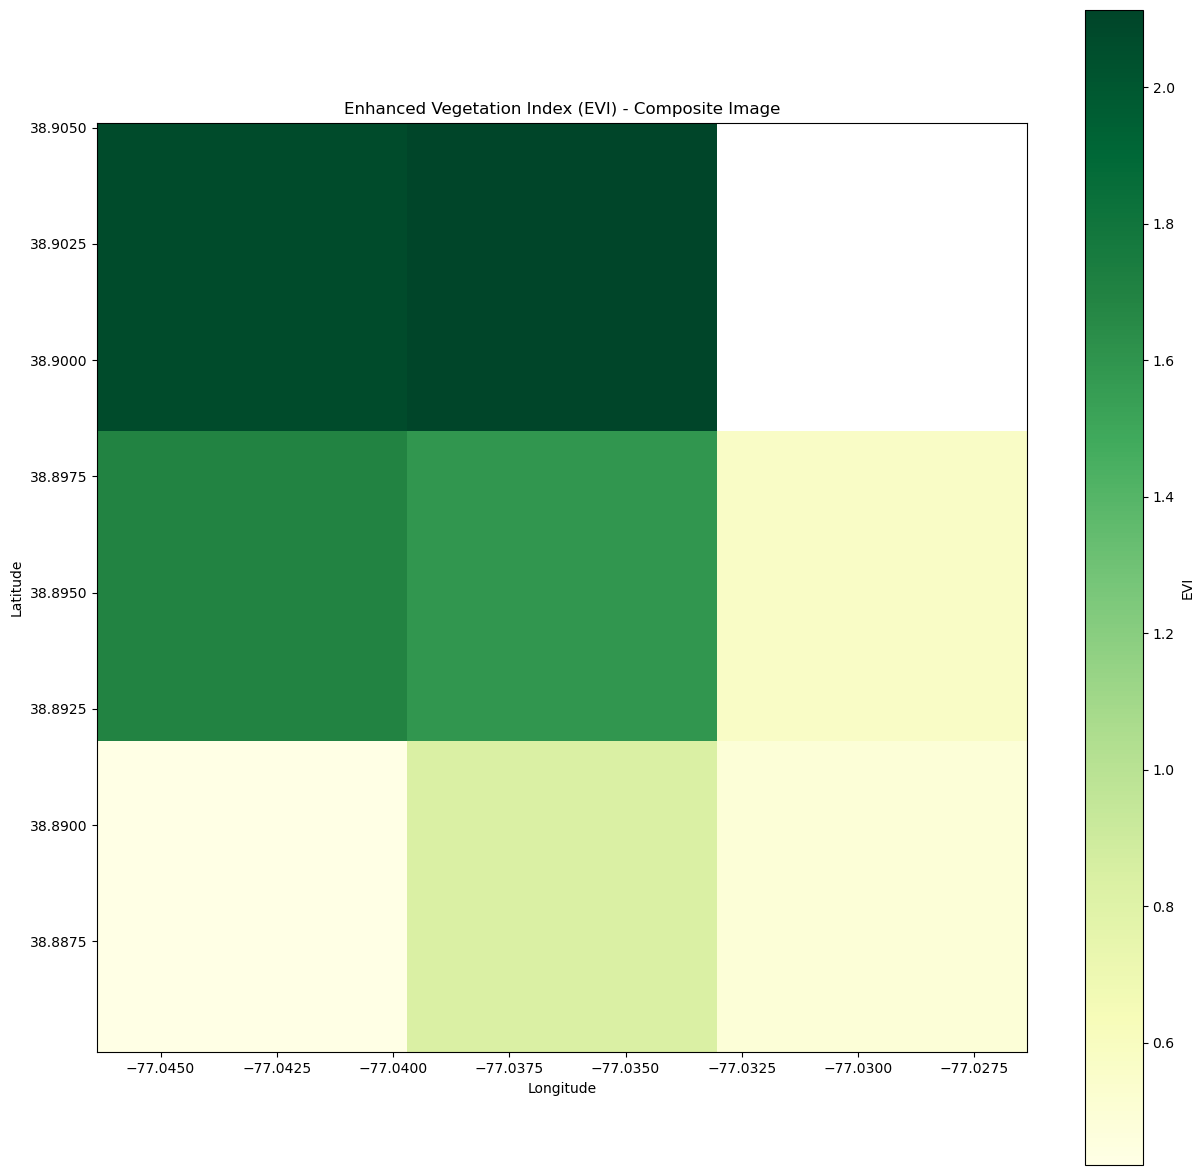

In [10]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import re

# List of GeoTIFF files
evi_geotiff_urls = [
    "./downloads/evi_cropped_output_38.885110000000005_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.885110000000005_-77.03637.tif",
    "./downloads/evi_cropped_output_38.885110000000005_-77.02637.tif",
    "./downloads/evi_cropped_output_38.89511_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.89511_-77.03637.tif",
    "./downloads/evi_cropped_output_38.89511_-77.02637.tif",
    "./downloads/evi_cropped_output_38.90511_-77.04637000000001.tif",
    "./downloads/evi_cropped_output_38.90511_-77.03637.tif",
    "./downloads/evi_cropped_output_38.90511_-77.02637.tif"
]

# Extract latitude and longitude from filenames and load data
evi_data_list = []
latitudes = []
longitudes = []

for tiff_file in evi_geotiff_urls:
    try:
        # Extract latitude and longitude from filename using regex
        match = re.search(r'output_([-0-9.]+)_([-0-9.]+)\.tif$', tiff_file)
        if match:
            latitude = float(match.group(1))
            longitude = float(match.group(2))
            latitudes.append(latitude)
            longitudes.append(longitude)

            # Load the data
            with rasterio.open(tiff_file) as dataset:
                evi_data = dataset.read(1)
                evi_data_list.append(evi_data)

    except Exception as e:
        print(f"Failed to load {tiff_file}: {e}")

# Convert latitudes and longitudes to sorted lists
unique_latitudes = sorted(set(latitudes))
unique_longitudes = sorted(set(longitudes))

# Create a 3x3 grid to hold the EVI data
evi_grid = np.empty((3, 3), dtype=object)

# Place each EVI data array in the correct location in the 3x3 grid
for idx, (lat, lon, evi) in enumerate(zip(latitudes, longitudes, evi_data_list)):
    row = unique_latitudes.index(lat)
    col = unique_longitudes.index(lon)
    evi_grid[row, col] = evi

# Plot the 3x3 composite image
fig, ax = plt.subplots(figsize=(15, 15))

# Create an empty array for the composite image
composite_image = np.block([[evi_grid[i, j] for j in range(3)] for i in range(3)])

# Plot the composite image
extent = [min(unique_longitudes), max(unique_longitudes), min(unique_latitudes), max(unique_latitudes)]
ax.imshow(composite_image, cmap='YlGn', extent=extent)

# Set axis labels and title
ax.set_title('Enhanced Vegetation Index (EVI) - Composite Image')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot with a colorbar
plt.colorbar(ax.imshow(composite_image, cmap='YlGn', extent=extent), ax=ax, label='EVI')
plt.show()
